In [1]:
install.packages(c("ggplot2", "dplyr"))
library(ggplot2)
library(dplyr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Load California housing data
file = '/content/SaratogaHouses.csv'
hData = read.csv(file, header = TRUE, stringsAsFactors = TRUE)
str(hData)

'data.frame':	1728 obs. of  16 variables:
 $ price          : int  132500 181115 109000 155000 86060 120000 153000 170000 90000 122900 ...
 $ lotSize        : num  0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ age            : int  42 0 133 13 0 31 33 23 36 4 ...
 $ landValue      : int  50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ livingArea     : int  906 1953 1944 1944 840 1152 2752 1662 1632 1416 ...
 $ pctCollege     : int  35 51 51 51 51 22 51 35 51 44 ...
 $ bedrooms       : int  2 3 4 3 2 4 4 4 3 3 ...
 $ fireplaces     : int  1 0 1 1 0 1 1 1 0 0 ...
 $ bathrooms      : num  1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5 ...
 $ rooms          : int  5 6 8 5 3 8 8 9 8 6 ...
 $ heating        : Factor w/ 3 levels "electric","hot air",..: 1 3 3 2 2 2 3 2 1 2 ...
 $ fuel           : Factor w/ 3 levels "electric","gas",..: 1 2 2 2 2 2 3 3 1 2 ...
 $ sewer          : Factor w/ 3 levels "none","public/commercial",..: 3 3 2 3 2 3 3 3 3 1 ...
 $ waterfront     : Factor w

# Residual Plots
Residual `R = Y - Yhat = Y - XBeta` is a catch-all quantifier for everything that the linear model does not capture. Everything that is missed by the linear model is captured or quantified by `residuals`. It
 could be:
 - non-linearity with respect to the features
 - could be the features of predictors that we have not included in the model
 - random noise that is inherent in the population model between Y and X
 - could be interaction effects between features.

 Therefore, there are a lot of things that can get absorbed into what is not explained by the linear model. So, the Residual is a catch-all quantifier for everything that the linear model does not capture.

 ## Factors affecting Residuals:
 1. Residuals is `uncorrelated` with the fitted resposne value.

In [3]:
# Load the mtcars dataset
file = '/content/mtcars1.csv'
carData = read.csv(file, header = TRUE, row.names = 1, stringsAsFactors = FALSE)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: int  4 4 1 1 2 1 4 2 2 4 ...


In [4]:
# Building a linear regression model for mpg as a function of hp and wt
model = lm(data = carData, mpg ~ hp + wt)
summary(model)


Call:
lm(formula = mpg ~ hp + wt, data = carData)

Residuals:
   Min     1Q Median     3Q    Max 
-3.941 -1.600 -0.182  1.050  5.854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.22727    1.59879  23.285  < 2e-16 ***
hp          -0.03177    0.00903  -3.519  0.00145 ** 
wt          -3.87783    0.63273  -6.129 1.12e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.593 on 29 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8148 
F-statistic: 69.21 on 2 and 29 DF,  p-value: 9.109e-12


If we look at the adjusted R-squared, we can see that the model is able to explain 81% variants in the mpg of the cars with only two predictors hp and wt.

In [5]:
residuals(model)

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
        -2.57232940         -1.58348256         -2.47581872          0.13497989 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
         0.37273336         -2.37381631         -1.29904236          1.51293266 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
         0.80632669         -0.77945988         -2.17945988          0.67463146 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
         0.25616901         -1.64993945          0.04479541          1.03726743 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
         5.50751301          5.80097202          1.08761978          5.85379085 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
        -3.08644148         -3.31136386         -3.94097947         -1.25202805 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
         2.44325481         -0.32665313         -0.03737415          2.63023081 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
        -0.74648866         -1.22541324          2.26052287         -1.58364943

In [6]:
predict(model)

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
          23.572329           22.583483           25.275819           21.265020 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          18.327267           20.473816           15.599042           22.887067 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          21.993673           19.979460           19.979460           15.725369 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
          17.043831           16.849939           10.355205            9.362733 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
           9.192487           26.599028           29.312380           28.046209 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
          24.586441           18.811364           19.140979           14.552028 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
          16.756745           27.626653           26.037374           27.769769 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
          16.546489           20.925413           12.739477           22.983649

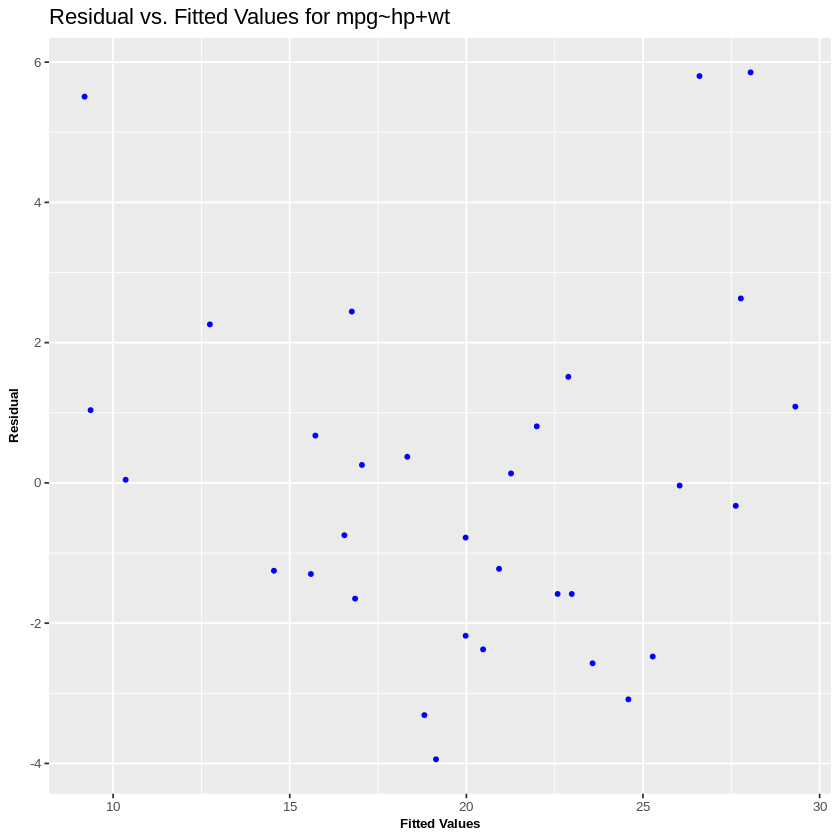

In [7]:
# Residual is uncorrelated with fitted values
rData = data.frame(cbind(as.numeric(residuals(model)), as.numeric(predict(model))))
colnames(rData) = c('residual', 'yhat')
ggplot(data = rData, aes(x = yhat, y = residual)) +
  geom_point(size = 1, color = 'blue') +
  labs(x = 'Fitted Values', y = 'Residual') +
  ggtitle("Residual vs. Fitted Values for mpg~hp+wt") +
  theme(axis.text = element_text(size = 8),
   axis.text.x = element_text(size = 8),
   axis.text.y = element_text(size = 8),
   axis.title = element_text(size = 8, face = "bold"))

Here, we are calculating the correlation between the residuals and the fitted values (predicted mpg).

We mad the scatter-plot between these two vectors but we immediately do not observe anything but then there seems to be some sort of a shape that is evident. "U" Like shape.

Let's look at the correlation  to check if there is apparent linear relationship between residuals and the fitted values.

In [8]:
cor(residuals(model), predict(model))

[1] 2.485142e-16

It's practically zero.

It is always true that the residuals for any model is uncorrelated with the fitted values.

## 2. Residual is positively correlated with true response values

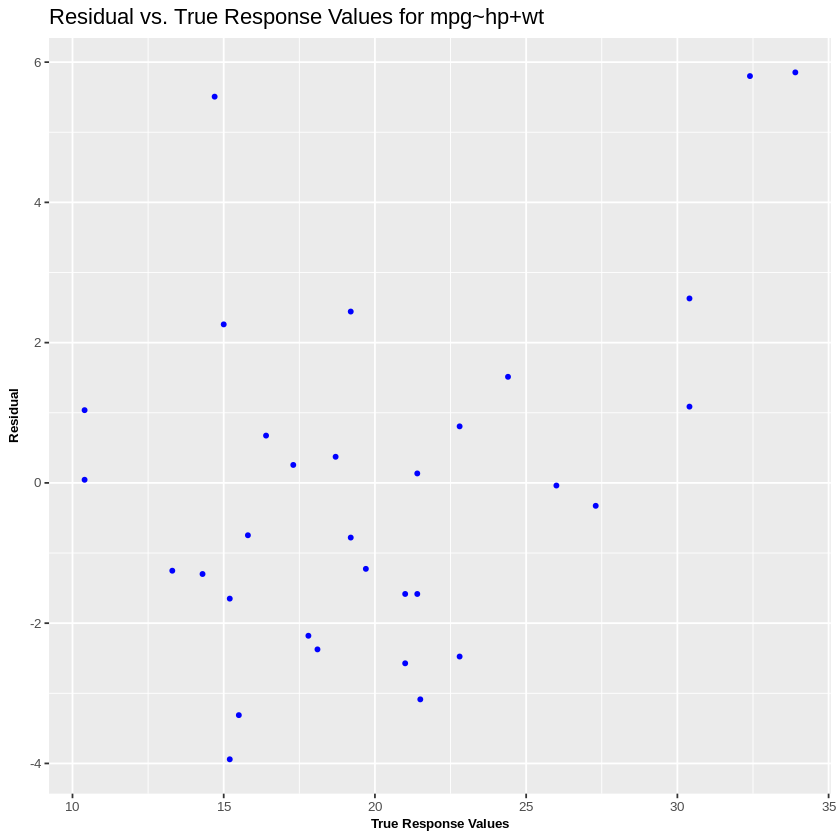

In [9]:
# Residual is positively correlated with true response values
rData = data.frame(cbind(as.numeric(residuals(model)), carData$mpg))
colnames(rData) = c('residual', 'y')
ggplot(data = rData, aes(x = y, y = residual)) +
  geom_point(size = 1, color = 'blue') +
   labs(x = 'True Response Values', y = 'Residual') +
   ggtitle("Residual vs. True Response Values for mpg~hp+wt") +
   theme(axis.text = element_text(size = 8),
   axis.text.x = element_text(size = 8),
   axis.text.y = element_text(size = 8),
   axis.title = element_text(size = 8, face = "bold"))

In [10]:
cor(residuals(model), carData$mpg)

[1] 0.4161905

We can see that there is about 41%  correlation. There is some linear relationship bertween residual and the fitted values.

We can also say that as the true-value increases, the residuals also tend to increase slightly in a linear fashion.

### Why are we looking ath the connecttion between the fitted values and the two resposne values?

Because such plots indicate wether there is something wrong with the dataset as well as the assumptions of linear regression are concerned.

In [11]:
mean(residuals(model))

[1] 1.734723e-17

Mean is preactically 0 for any datasets.

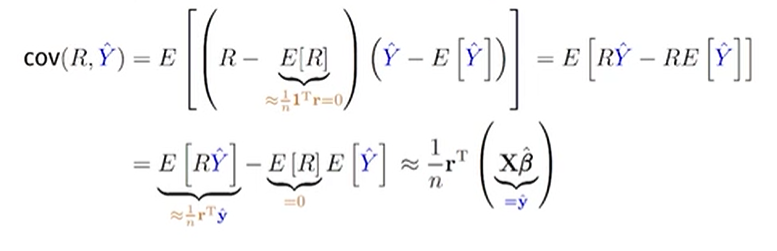



Residual is `+vely correlated` with true response value: cov(R,Y) = `sigma-squared`

## **Residual Plot**
A residual plot shows the relationship between the `residuals` and the `fitted values`.

(There is a +ve correlation between the residual and the true response value so ther is no point plotting it.)

In [12]:
# Building a linear regression model for mpg as a function of hp
model = lm(data = carData, mpg ~ hp)
summary(model)


Call:
lm(formula = mpg ~ hp, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


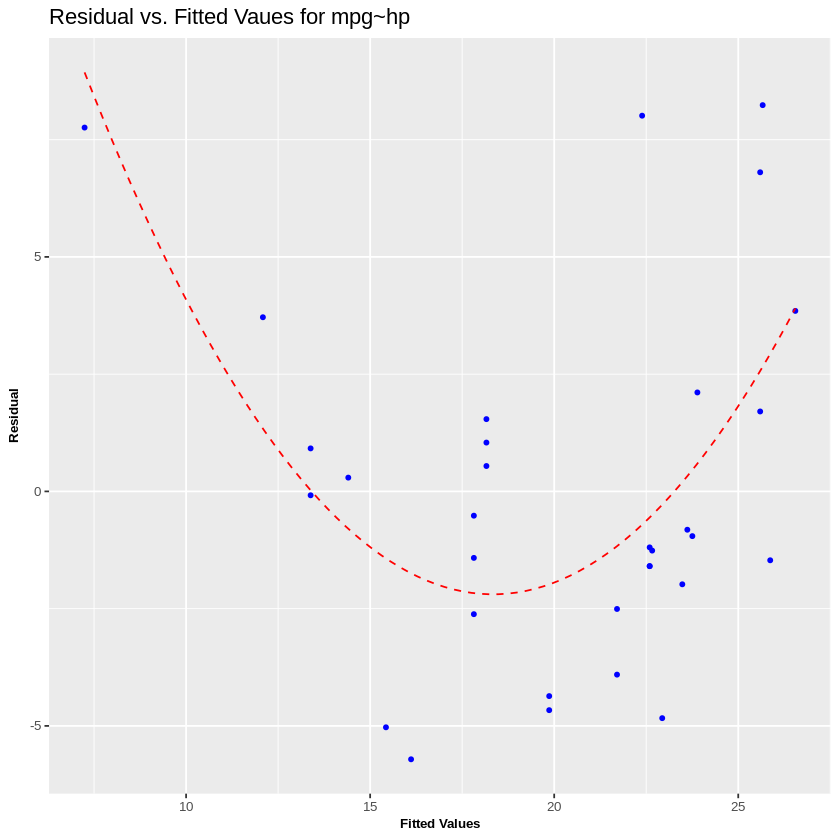

In [13]:
# Residual plot
rData = data.frame(cbind(as.numeric(residuals(model)), as.numeric(predict(model))))
colnames(rData) = c('residual', 'yhat')
ggplot(data = rData, aes(x = yhat, y = residual)) +
  geom_point(size = 1, color = 'blue') +
  geom_smooth(se=FALSE, method="lm", formula = y~x+I(x^2), color = 'red', size = 0.5, linetype = "dashed")+
   labs(x = 'Fitted Values', y = 'Residual') +
   ggtitle("Residual vs. Fitted Vaues for mpg~hp") +
   theme(axis.text = element_text(size = 8),
   axis.text.x = element_text(size = 8),
   axis.text.y = element_text(size = 8),
   axis.title = element_text(size = 8, face = "bold"))

There seems to be a definite pattern which is an indication that there is a non-linearity in the data.

As soon as we start seeing patterns then there is a problem. So we calculate the correlation coefficient between the residual and the fitted value which should be close to 0.This is indicative of non-linearity in the data.

In [14]:
# Build another linear regression model for mpg as a function of hp and hp^2
model = lm(data = carData, mpg ~ hp + I(hp^2))
summary(model)


Call:
lm(formula = mpg ~ hp + I(hp^2), data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5512 -1.6027 -0.6977  1.5509  8.7213 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.041e+01  2.741e+00  14.744 5.23e-15 ***
hp          -2.133e-01  3.488e-02  -6.115 1.16e-06 ***
I(hp^2)      4.208e-04  9.844e-05   4.275 0.000189 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.077 on 29 degrees of freedom
Multiple R-squared:  0.7561,	Adjusted R-squared:  0.7393 
F-statistic: 44.95 on 2 and 29 DF,  p-value: 1.301e-09


We want hp-squared to be treated as variable so we are using the `I` function.

### **Why the hp-squared?**
Because the residual plot showed some sort of parabolic relationship.

Noe: Even though this has hp-squared the model is still linear.

`Yhat = B0 + B1*hp + B2*hp-squared`

hp-squared is non-linearlly related to hp so we do not have to worry about collinearity.

- The advantage in using hp-squared in this model is that it will overwhelm the issues created by a mild colinearity.

In [15]:
summary(model)


Call:
lm(formula = mpg ~ hp + I(hp^2), data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5512 -1.6027 -0.6977  1.5509  8.7213 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.041e+01  2.741e+00  14.744 5.23e-15 ***
hp          -2.133e-01  3.488e-02  -6.115 1.16e-06 ***
I(hp^2)      4.208e-04  9.844e-05   4.275 0.000189 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.077 on 29 degrees of freedom
Multiple R-squared:  0.7561,	Adjusted R-squared:  0.7393 
F-statistic: 44.95 on 2 and 29 DF,  p-value: 1.301e-09


The first thing we observe in this model is the adjusted `R-squared` is around 74% and most importantly, the `hp-squared` is actually playing an important role. It's `p-value `is much smaller than our practical threshold `0.05/0.01`.

This is an indication that the model is doing a good job.

----

Now, let's make a plot of residual vs fitted values.

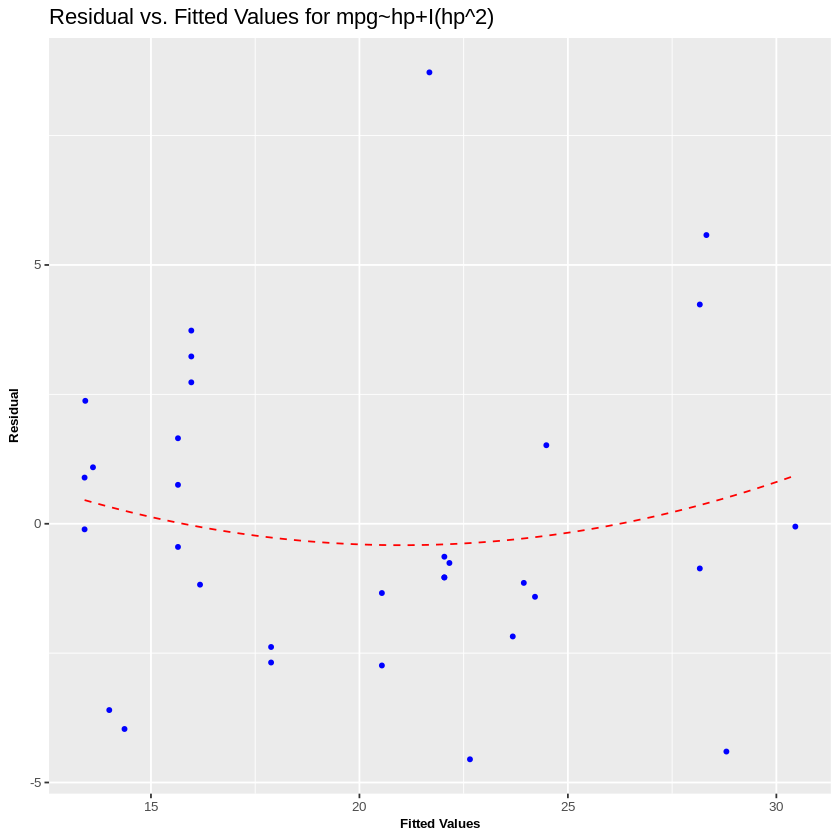

In [16]:
# Residual plot
rData = data.frame(cbind(as.numeric(residuals(model)), as.numeric(predict(model))))
colnames(rData) = c('residual', 'yhat')
ggplot(data = rData, aes(x = yhat, y = residual)) +
  geom_point(size = 1, color = 'blue') +
  geom_smooth(se=FALSE, method="lm", formula = y~x+I(x^2), color = 'red', size = 0.5, linetype = "dashed")+
   labs(x = 'Fitted Values', y = 'Residual') +
   ggtitle("Residual vs. Fitted Values for mpg~hp+I(hp^2)") +
   theme(axis.text = element_text(size = 8),
   axis.text.x = element_text(size = 8),
   axis.text.y = element_text(size = 8),
   axis.title = element_text(size = 8, face = "bold"))

We see that the residuals are uncorrelated with the fitted values as we expected. This gives us some sort of satisfaction with out model after we included the hp-squared as one of the feature. `The residual seem to be uncorrelated with respect to the fitted value.`

*** Whenever you see a pattern in the residual plot, it reflects a non-linearity with respect to the response and the predictors.***

A residual plot with discernible pattern is an indication of nonlinearity.
- So we want to apply some sort of a transformation like 'square, 'square-root' etc and build the regression model again.

## Let's check which model is better by checking the residuals:

In [25]:
# average residuals sum of squares
sum(residuals(model)^2) /(nrow(carData) - 2)

# residual standard error
round(sqrt(sum(residuals(model)^2) /(nrow(carData) - 2)),2)

[1] 9.154389

[1] 3.03

In [31]:
summary(model)


Call:
lm(formula = mpg ~ hp + I(hp^2), data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5512 -1.6027 -0.6977  1.5509  8.7213 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.041e+01  2.741e+00  14.744 5.23e-15 ***
hp          -2.133e-01  3.488e-02  -6.115 1.16e-06 ***
I(hp^2)      4.208e-04  9.844e-05   4.275 0.000189 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.077 on 29 degrees of freedom
Multiple R-squared:  0.7561,	Adjusted R-squared:  0.7393 
F-statistic: 44.95 on 2 and 29 DF,  p-value: 1.301e-09


### Now we can check which model has the smaller `residual standard error`:

- We have a model where we regressed mpg on hp. it was 3.863.
- When we squared the hp, it came down to 3.077.

This also has an improved adjusted-R-squared value meaning that the model is able to explain the relationship between mpg and hp ina better way.


# Continuning interpreting Residual Plots:

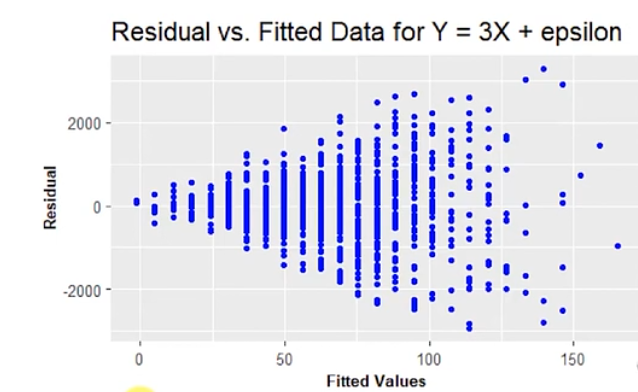

The plot can also have a funnel like shape which is a problem as it is also a pattern.

For example as the predicted mpg get bigger they are more scattered around 0. `Higher the predicted mpg, more the residual could be potentially be from 0.

`This means that the residual or the random error did not have the constant variance.`

The variance or the deviation from hp should not depend on which sample we are observing. It should not be high for some samples and low for some others. It should be random havinga constant variance around 0.


As we have a population model:

`Y = f (X1, X2, X3, ....., Xn) + E`

This random error term was assumed to have a 0 mean and a constant variance independent of the sample.

- But the above figure shows a definite relationship between the residual and the fitted value.

This scenario is also known as `Heteroskedasticity`.
- skedasticity here refers that the variants are hetero here.

-------

A funnel-shaped residual plot is an indication of **heteroskedasticity**, whcih means that the random error term `does not` have a constant variance impacting the standard error, CI and hypothesis test calculations.

The model above is predicting in such a way that even in the prediction space its taking a `funnel` like shape where predictions are getting away from the true value and scatter aorund the true value.

-----

Let's check with a hypothetical example:


In [43]:
# Generating heteroscedastic data

# generating random number as X
nsamples = 1000
X = rpois(nsamples, 20)
X

[1] 13 22 30 16 19 22 16 17 22 24 23 14 10 19 20 29 23 16 29 12 17 20 14 16
  [25] 18 12 20 18 18 24 27 14 19 23 15 19 31 22 17 18 17 22 19 20 19 15 26 21
  [49] 24 20 21 18 30 22 23 24 12 13 29 16 17 21 10 20 22 21 18 22 16 17 22 15
  [73] 25 20 23 31 16 15 16 26 18 18 19 21 15 18 17 16 22 24 22 19 11 24 17 27
  [97] 19 18 23 23 22 23 12 22 21 10 26 13 17 22 31 29 25 26 16 20 31 23 22 18
 [121] 16 21 19 23 20 16 20 18 27 27 22 23 20 20 26 22 21 19 14 26 17 26 14 17
 [145] 25 20 22 23 27 17 20 23 27 17 22 28 24 19 15 24 28 14 27 24 25 23 24 16
 [169] 24 22 17 18 21 28 20 22 23 22 19 19 16 25 17 17 17 14 11 26 13 23 14 15
 [193] 21 13 14 26 15 17  8 16 26 18 17 15 15 12 20 20 19 24 18 22 24 25 15 22
 [217] 12 15 24 20 18 21 23 20 21 13 18 20 24 25 20 22 14 16 15 21 17 21 16 17
 [241] 23 21 23 23 15 20 27 17 15 27 20 23 15 28 15 15 19 11 27 21 21 20 19 15
 [265] 20 17 21 17 22 18 16 16 26 24 24 20 23 27 15 24 20 13 22 21 22 25 21 14
 [289] 14 20 11 16 26 20 23 24 37 21 25 18 14 17 18 15 18 21 26 16 17 21 14 22
 [313] 11 14 19 27 14 21 24 17 24 17 32 19 16 19 13 26 16 21 24 20 28 21 10 18
 [337] 24 27 16 22 24 25 24 15 26 12 21 16 15 19 22 24 17 27 19 18 16 17 17 30
 [361] 17 11 19 28 23 26 16 21 19 17 21 23 18 20 26 21 20 22 25 16 17 20 19 12
 [385] 17 22 26 25 20 19 19 20 17 24 23 15 20 21 28 24 26 16 19 24 15 28 16 14
 [409] 22 19 15 25 23 13 15 19 24 22 19 19 18 27 11 23 15 19 23 21 16 16 23 22
 [433] 14  9 21 21 24 18 23 20 15 13 20 29 17 16 21 19 31 25 21 20 25 17 24 14
 [457] 25 20 22 13 20 28 25 17 22 22 20 20 23 20 29 17 14 22 23 20 14 17 18 20
 [481] 21 19 25 26 21 30 18 16 23 25 28 28 20 20 19 17 24 20 26 19 23 20 15 24
 [505] 16 18 15 14 15 22 23 21 18 18 15 18 22 14 21 21 18 22 24 22 15 19 28 19
 [529] 21 26 21 21 19 15 25 19 30 23 19 16 34 30 26 33 25 26 19 21 27 17 21 24
 [553] 25 17 21 13 18 16 11 21 21 23 25 24 24 21 21 25 12 26 15 23 15 34 21 20
 [577] 17 24 22 16 17 18 22 15 24 17 25 27 26 26 12 19 21 17 21 28 18 14 32 23
 [601] 20 22 16 23 14 25 22 10 14 18 27 16 22 23 16 19 22 23 18 19 20 19 20 19
 [625] 17 19 15 13 20 25 21 15 23 15  9 18 26 25 23 26 22 20 23 18 21 18 24 13
 [649] 25 18 16 11 18 22 25 13 15 15 14 15 13 25 23 20 16 19 21 23 25 20 18 18
 [673] 11 19 29 14 18 23 17  9 26 23 23 28 19 20 15 22 20 17 25 15 24 21 18 13
 [697] 19 25 16 18 24 22 25 20 24 15 22 26 21 17 19 21 23 15 28 21 18 19 18 19
 [721] 21 15 16 20 24 20 21 23 15 16 22 17 20 14 26 22 19 25 19 18 19 30 18 19
 [745] 18 16 26 20 23 14 22 14 15 23 15 30 17 19 19 15 34 18 17 17 22 25 15 14
 [769] 15 14 15 23 22 24 25 16 37 15 27 19 21 15 25 28 20 22 16 20 23 27 23 29
 [793] 32 14 18 26 14 13 16 20 15 20 18 17 19 19 12  9 14 20 21 15 20 14 16 20
 [817] 24 20 18 29 22 16 21 18 18 18 13 17 21 22 16 18 24 22 15 23 18 22 22 22
 [841] 26 25 15 20 14 19 19 20 22 13 18 14 21 11 21 18 15 16 16 20 16 14 20 26
 [865] 20 19 23 32 19 25 18 19 28 20 19 13 28 16 21 16 12 29 17 18 20 21 24 14
 [889] 22 20 22 20 19 17 30 24 24 23 24 25 15 14 20 21 20 26 14 27 12 23 21 21
 [913] 15 25 16 21 12 22 20 21 20 23 20 22 26 17 16 14 23 14 21 23 25 15 21 19
 [937] 26 20 19 27 23 22 20 22 16 30 20 18 22 20 15 25 15 21 17 17 14 16 20 14
 [961] 12 24 20 23 20 31 16 16 24 20 25 23 19 17 23 28 26 16 18 21 25 18 15 22
 [985] 21 26 18 11 19 25 21 28 23 16 17 17 26 22 20 23

In [44]:
# standard deviation of the rendom error term
# if X gets bigger than the randon error term is going to have a standard deviation that is also going to be bigger.
sd_err = 2*X^2

In [45]:
# we now build the population model as above
Y = 3*X + rnorm(nsamples, 0, sd_err) # here, the sd_error is not constant - depending on he predictor value X
hetscData = data.frame(cbind(X, Y))
colnames(hetscData) = c('X', 'Y')
head(hetscData, 5)

,X,Y
,<dbl>,<dbl>
1,13,-184.3272
2,22,331.0612
3,30,407.7591
4,16,-535.7645
5,19,-694.3602


In [35]:
# Building a linear regression model for Y as a function of X
model = lm(data = hetscData, Y ~ X)
summary(model)


Call:
lm(formula = Y ~ X, data = hetscData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5411.7  -512.3   -13.4   517.3  4069.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -92.255    136.976  -0.674    0.501
X              8.556      6.744   1.269    0.205

Residual standard error: 934.7 on 998 degrees of freedom
Multiple R-squared:  0.00161,	Adjusted R-squared:  0.0006098 
F-statistic:  1.61 on 1 and 998 DF,  p-value: 0.2048


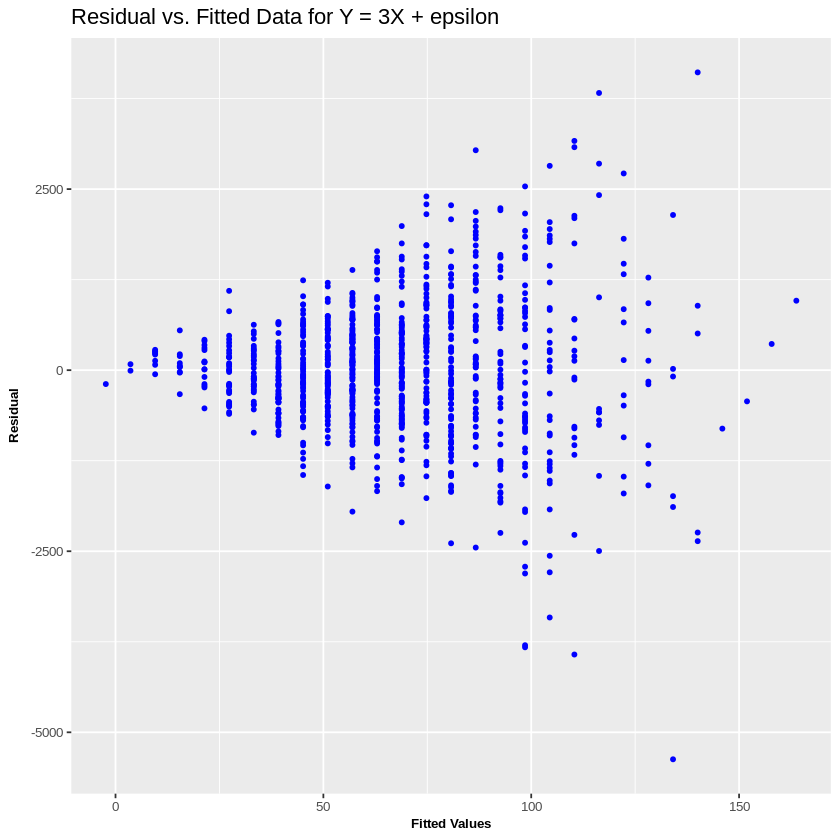

In [46]:
# Residual plot
rData = data.frame(cbind(as.numeric(residuals(model)), as.numeric(predict(model))))
colnames(rData) = c('residual', 'yhat')
ggplot(data = rData, aes(x = yhat, y = residual)) +
  geom_point(size = 1, color = 'blue') +
   labs(x = 'Fitted Values', y = 'Residual') +
   ggtitle("Residual vs. Fitted Data for Y = 3X + epsilon") +
   theme(axis.text = element_text(size = 8),
   axis.text.x = element_text(size = 8),
   axis.text.y = element_text(size = 8),
   axis.title = element_text(size = 8, face = "bold"))

In [38]:
summary(model)


Call:
lm(formula = Y ~ X, data = hetscData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5411.7  -512.3   -13.4   517.3  4069.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -92.255    136.976  -0.674    0.501
X              8.556      6.744   1.269    0.205

Residual standard error: 934.7 on 998 degrees of freedom
Multiple R-squared:  0.00161,	Adjusted R-squared:  0.0006098 
F-statistic:  1.61 on 1 and 998 DF,  p-value: 0.2048


### What is the remedy?
 As we can see below, X is 8.556 as true population parameter is 3 {Y = 3*X + rnorm(nsamples, 0, sd_err)}. It is predicted as 8.55 coefficient estimate.

 As we regenerate the dat, we will be able to see a lot of variance.

 Here, the model seems to be affected by those samples that have a large variance in their residual.

 So to deal with this we look at `Weighted Least Squares`.

 -----

 ### Weighted least Squares:
 It is simlilar to ordinary least squares method where we minimize the sum of squares of the variables. As noe we know that some of the variables are very big, or some of them are very small, we apply a weight to each residual.

 In `weighted least squares` we minimize the sum of the squares of the weighted residuals for all samples in the dataset.

 - the weight for the residual that are big should be samll
 - the weight for the residuals that are small should be big

 ### How do we choose the weight?
 The weights are chosen such that the samples with large error variances contribute less to the summation below, thus to the linear model:

 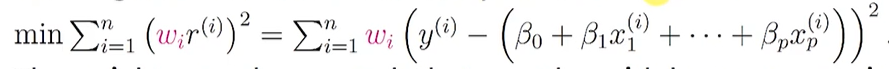

But typically, the recorded response for the ith sample is not just one value. The recorded response for the ith sample is calculated as an average of ni raw observations.
- We assume that each of those raw observation are uncorrelated with constant variance sigma-squared. It's not always going to be the same value.

- So we add all those observations and divide it by n.
- then the variance of the ith recorded response is `sigma-squared / ni`.

-----

So we take the weight inversly proportional to the value obtained by `sigma-squared / ni`. The wight has to be small if the variance is big and vice versa.

- One way to do it:

An easy way to do this is simply choosing the weight for the ith sample equal to the number of samples from which we record the observation for the ith sample.

- Another way:

Is by knowing the underlying process. In the above example we have specifically said that the standard error is 2 times x required for the random error term.

`sd_err = 2*X^2`

Here, 2 times hear-rate squared is the random error. Our variance is 4 times X^4.

Therefore, we exactly know the definition of the variance of the error here which is not constant and depending on X.

In [47]:
# Build a weighted linear regression model for Y as a function of X
weights = 1/(4*X^4)
model = lm(data = hetscData, Y ~ X, weights = weights)
summary(model)


Call:
lm(formula = Y ~ X, data = hetscData, weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3.2063 -0.6169 -0.0153  0.6400  3.5304 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -54.675     71.626  -0.763    0.445
X              6.845      4.447   1.539    0.124

Residual standard error: 1.012 on 998 degrees of freedom
Multiple R-squared:  0.002369,	Adjusted R-squared:  0.001369 
F-statistic: 2.369 on 1 and 998 DF,  p-value: 0.124


If we run this model with regenearted dataset few times we can observe that the deviation of the value of X is not as bad as the original linear regression model which had no weighted values.

In conclusion we are pullong down the data points that have large residuals and make them contribute less to the model.